this is data analysis on a **real breast cancer dataset** available on kaggle.com

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.<br>
 They describe characteristics of the cell nuclei present in the image.<br>
the 3-dimensional space is that described in: <br>
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets",<br>
 Optimization Methods and Software 1, 1992, 23-34].<br>

This database is also available through the UW CS ftp server: <br>
ftp ftp.cs.wisc.edu<br>
cd math-prog/cpo-dataset/machine-learn/WDBC/<br>


In [ ]:
#basic overview on the data:

#jupyter nbconvert --to html --template lab meu_notebook.ipynb

import pandas as pd
import seaborn as sns 
from sklearn import 
data = pd.read_csv("data.csv")
data.head() 
data.loc[data["diagnosis"] == "M", "diagnosis"] = 1
data.loc[data["diagnosis"] == "B", "diagnosis"] = 0

data = data.drop("Unnamed", axis = 1)


KeyError: "['Unnamed'] not found in axis"

<Axes: xlabel='radius_mean', ylabel='smoothness_mean'>

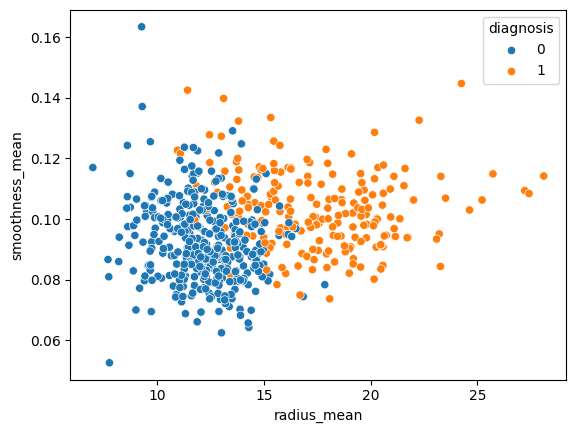

In [36]:

sns.scatterplot(x = data["radius_mean"], y = data["smoothness_mean"],hue = data["diagnosis"])


there's a clear **separation** for radius mean, R < 15 is basically all benile cancer.<br>
smothness doesn't seem to change that much

<Axes: xlabel='texture_mean', ylabel='perimeter_mean'>

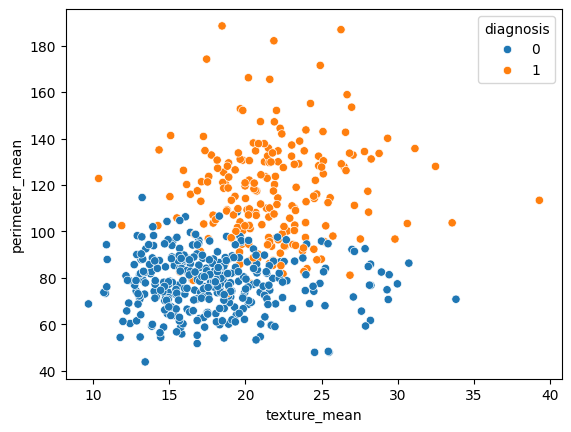

In [37]:
sns.scatterplot(x = data["texture_mean"], y = data["perimeter_mean"], hue = data["diagnosis"])

**mean perimeter** also seems to play a role separating the 2 groups: all **benile** for  P < 100 <br>
**"texture_mean"** doesn't seem to separate the 2 groups that much, allthough <br>
there is a small corelation, i might take a better look at it


<Axes: xlabel='texture_mean', ylabel='Density'>

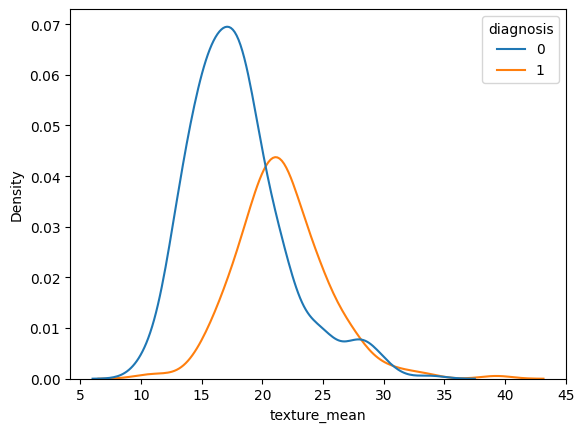

In [38]:
sns.kdeplot(x = data["texture_mean"], hue = data["diagnosis"])


there's clearly 2 normal distributions, the B type  has a slightly lower **texture mean** ,<br>
it's cool to look at individual variables, but there's 33 of them, so let's speed up thigs here:

In [40]:

data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
